# Explanation of notebook

This notebook does the following :

LINE PLOT :
* selects the index p of the particles for each zone (gyre, north, west, east, east_west, masked at all time) thanks to count_in_zones(). They are saved in dictionary Index_Ensembles[NPP]
* goes through the indexes of 'north' and test a threshold of minimum 3 time steps over the front and saves in Ind_parti_north[NPP] the parti that pass the threshold test and in Ind_parti_stay_gyre[NPP] the parti that don't pass the threshold test and are therefore considered part of the 'gyre' category
* loops to save the t indexes of particles that go north thanks to Ind_parti_north[NPP] (use of southern_front), called T_step_parti_north[NPP]
* adds the index of parti in RS to index of parti that are considered in RS after test of threshold : Index_Ensembles[NPP]['gyre'] + Ind_parti_stay_gyre[NPP]
* creates new list for indexes of parti that go north equal to the list obtained with threshold Index_Ensembles[NPP]['north'] = Ind_parti_north[NPP]
* now that we have all the indexes for each zone, we calculate the evolution over time thanks to count_zones2()
* we store the results in a dictionary Ensembles[NPP]
* we sum up all the NPPs in Sum_Zones[NPP]
* we plot the line plot thanks to Sum_Zones[NPP]

HISTOGRAMS : 
* thanks to Ind_parti_north[NPP] and T_step_parti_north[NPP] we calculate the depths, lons and times (year and month) of the crossing of the front
* we plot 3 histograms

In [15]:
from func_pickle import pickle_save, pickle_load

In [16]:
%matplotlib inline

# Import packages
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi
import h5py
from scipy.io import loadmat
from mpl_toolkits.basemap import Basemap
import netCDF4
from scipy import interpolate
import os
import pickle
import cmocean

plot_path_1993_2017='/home/ebent/plots/1993_2017/'
plot_path_2006_2011='/home/ebent/plots/2006_2011/'
plot_path_jup='/home/ebent/plots/2006_2011/jup2/'
load_path='/data/mmazloff/AVISO/'
load_path2='/data/SO12/runs/RUN_BLING_Dec2017/SO12_RUN/DIAGNOSTICS/'
load_path3='/data/soccom/GRID_12/'

In [17]:
southern_front = pickle_load('ACC_southern_front', '/data/ebent/', verbose=False)
southern_front = np.ma.masked_array(southern_front, mask=False)

In [18]:
W_boundary = 12 # 121,04 degrees
E_boundary = 1560 # 250,04 degrees

In [19]:
# Create a meshgrid to plot in index coordinates
xc = np.arange(1801)
yc = np.arange(1024)
xc, yc = np.meshgrid(xc,yc)

In [20]:
npts = 10000

In [21]:
max_time_experiment = 148
npp = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
Z = ['Z1','Z2','Z3','Z4','Z5','dead']

***

In [139]:
title_depth = '150m'

In [140]:
path_load = '/data/ebent/Octopus/output/' + title_depth + '_line_RG/'
print path_load

/data/ebent/Octopus/output/150m_line_RG/


In [141]:
path_save = '/data/ebent/Octopus/output/' + title_depth + '_line_RG/' + title_depth + '_analysis/'
print path_save

/data/ebent/Octopus/output/150m_line_RG/150m_analysis/


In [142]:
path_save_fig = '/home/ebent/Desktop/' + title_depth + '_figs/'
print path_save_fig

/home/ebent/Desktop/150m_figs/


In [143]:
# To create directory to store figures
import os
path = '/home/ebent/Desktop/' + title_depth + '_figs/'
os.makedirs(path)

***

## Load variables calculated in this notebook

In [111]:
Index_Ensembles = pickle_load('Index_Ensembles', path_save)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/Index_Ensembles.npy')


In [112]:
Ind_parti_north = pickle_load('Ind_parti_north', path_save)
T_step_parti_north = pickle_load('T_step_parti_north', path_save)

Ind_parti_stay_gyre = pickle_load('Ind_parti_stay_gyre', path_save)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/Ind_parti_north.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/T_step_parti_north.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/Ind_parti_stay_gyre.npy')


In [113]:
Ensembles = pickle_load('Ensembles', path_save)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/Ensembles.npy')


In [114]:
Sum_Zones = pickle_load('Sum_Zones', path_save)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/Sum_Zones.npy')


In [115]:
DEP_cross = pickle_load('DEP_cross', path_save)
LON_cross = pickle_load('LON_cross', path_save)
TIME_cross = pickle_load('TIME_cross', path_save)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/DEP_cross.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/LON_cross.npy')
('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/TIME_cross.npy')


In [120]:
Five_Years_1_list = pickle_load('Five_Years_1_list', path_save)

('loaded from : ', '/data/ebent/Octopus/output/50m_line_RG/50m_analysis/Five_Years_1_list.npy')


In [121]:
analysis = []
for i in range(len(TIME_cross)):
    analysis.append(Five_Years_1_list[np.array(TIME_cross[i])*10])

In [122]:
from collections import Counter

num = Counter(analysis)

In [123]:
x = list(num.values())
y = list(num.keys())

In [124]:
X = list(x)
Y = list(y)

In [125]:
for i in range(12):
    if y[i] == 'JAN':
        Y[0] = y[i]
        X[0] = x[i]
    if y[i] == 'FEV':
        Y[1] = y[i]
        X[1] = x[i]
    if y[i] == 'MAR':
        Y[2] = y[i]
        X[2] = x[i]
    if y[i] == 'APR':
        Y[3] = y[i]
        X[3] = x[i]
    if y[i] == 'MAY':
        Y[4] = y[i]
        X[4] = x[i]
    if y[i] == 'JUN':
        Y[5] = y[i]
        X[5] = x[i]
    if y[i] == 'JUL':
        Y[6] = y[i]
        X[6] = x[i]
    if y[i] == 'AUG':
        Y[7] = y[i]
        X[7] = x[i]
    if y[i] == 'SEP':
        Y[8] = y[i]
        X[8] = x[i]
    if y[i] == 'OCT':
        Y[9] = y[i]
        X[9] = x[i]
    if y[i] == 'NOV':
        Y[10] = y[i]
        X[10] = x[i]
    if y[i] == 'DEC':
        Y[11] = y[i]
        X[11] = x[i]

In [126]:
for i in range(12):
    print i, Y[i]

0 JAN
1 FEV
2 MAR
3 APR
4 MAY
5 JUN
6 JUL
7 AUG
8 SEP
9 OCT
10 NOV
11 DEC


***

# Line plot

### Select the index of the particles in each zone

In [85]:
def count_in_zones(NPP, xround, yround, zround):
    to_east = []
    to_west = []
    to_north = []
    in_RG = []
    to_west_east = []
    are_masked = []
    
    for p in range(npts):
        south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
        south_front.mask = xround[:,p].mask
        
        north_outside_RG = np.squeeze(np.array(np.ma.where(south_front==0))) # don't forget to use np.ma when dealing with masks
        west_outside_RG = np.squeeze(np.array(np.ma.where(xround[:,p]<=W_boundary))) 
        east_outside_RG = np.squeeze(np.array(np.ma.where(xround[:,p]>=E_boundary)))
        parti_are_masked = np.squeeze(np.array(np.ma.where(xround.mask[:,p]==False)))
        
        if north_outside_RG.size==0. and west_outside_RG.size==0. and east_outside_RG.size==0. and parti_are_masked.size>0.:
            in_RG.append(p)
        if north_outside_RG.size>0. and parti_are_masked.size>0.:
            to_north.append(p)
        if north_outside_RG.size==0. and west_outside_RG.size>0. and east_outside_RG.size==0. and parti_are_masked.size>0.:
            to_west.append(p)
        if north_outside_RG.size==0. and west_outside_RG.size==0. and east_outside_RG.size>0. and parti_are_masked.size>0.:
            to_east.append(p)
        if north_outside_RG.size==0. and west_outside_RG.size>0. and east_outside_RG.size>0. and parti_are_masked.size>0.:
            to_west_east.append(p)
        if parti_are_masked.size==0.:
            are_masked.append(p)
            
    print ''
    print 'NPP' + NPP + ' :'
    print ''
    print 'Particles that stay in the Ross Gyre :', len(in_RG)
    print 'Particles that go North :', len(to_north)
    print 'Particles that go West :', len(to_west)
    print 'Particles that go East :', len(to_east)
    print 'Particles that go East then West :', len(to_west_east)
    print 'Particles that are masked :', len(are_masked)
    print 'Total number of particles not dead :', len(in_RG)+len(to_north)+len(to_west)+len(to_east)+len(to_west_east)
    
    return in_RG, to_north, to_west, to_east, to_west_east, are_masked

### Stores the indexes of zones in a dictionary (Index_Ensembles) of dictionary (Index_Zones)
* particles that stay in gyre 
* particles that go north 
* particles that go west
* particles that go east
* particles that are masked all time steps

In [86]:
Index_Ensembles = {} 

for NPP in npp:
    Index_Zones = {}

    zround = pickle_load('NPP' + NPP + '_zround', path_load, verbose=False)[:max_time_experiment]
    yround = pickle_load('NPP' + NPP + '_yround', path_load, verbose=False)[:max_time_experiment]
    xround = pickle_load('NPP' + NPP + '_xround', path_load, verbose=False)[:max_time_experiment]

    Index_Zones['gyre'], Index_Zones['north'], Index_Zones['west'], Index_Zones['east'], Index_Zones['east_west'], Index_Zones['masked'] = count_in_zones(NPP, xround, yround, zround)
    Index_Ensembles[NPP] = Index_Zones

pickle_save('Index_Ensembles', path_save, Index_Ensembles)

IOError: [Errno 2] No such file or directory: '/data/ebent/Octopus/output/100m_line_RG_TSG/NPP01_zround.npy'

### Function to select parti north with threshold but save also index of parti that actualy ALWAYS stay in gyre

In [ ]:
def thresh(to_north):
    thresh_in_gyre = []
    thresh_to_north = []
    for p in to_north:
        
        south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
        south_front.mask = xround[:,p].mask # mask elements of south_front that are irrelevant
        
        where_north = np.squeeze(np.ma.where(south_front==0))
        
        if where_north.size>2 and where_north[1]==where_north[0]+1 and where_north[2]==where_north[1]+1:
            thresh_to_north.append(p)
        
        else:
            thresh_in_gyre.append(p)
            
    return thresh_to_north, thresh_in_gyre

In [ ]:
# Loop to save the p indexes of particles that go north after threshold and those who stay in the RS

Ind_parti_north = {}
Ind_parti_stay_gyre = {}

for NPP in npp:

    zround = pickle_load('NPP' + NPP + '_zround', path_load, verbose=False)[:max_time_experiment]
    yround = pickle_load('NPP' + NPP + '_yround', path_load, verbose=False)[:max_time_experiment]
    xround = pickle_load('NPP' + NPP + '_xround', path_load, verbose=False)[:max_time_experiment]

    to_north = Index_Ensembles[NPP]['north']
    
    thresh_to_north, thresh_in_gyre = thresh(to_north)
    
    Ind_parti_north[NPP] = thresh_to_north
    Ind_parti_stay_gyre[NPP] = thresh_in_gyre
    
    print ''
    print 'Particles that go North with threshold :', len(thresh_to_north)
    print 'Particles that stay in gyre with threshold :', len(thresh_in_gyre)
    print 'Sum : ', len(thresh_to_north) + len(thresh_in_gyre)
    
pickle_save('Ind_parti_north', path_save, Ind_parti_north)
pickle_save('Ind_parti_stay_gyre', path_save, Ind_parti_stay_gyre)

In [ ]:
# Loop to save the t indexes of particles that go north thanks to index of p we selected above, use of southern_front

T_step_parti_north = {}

for NPP in npp:
    
    yround = pickle_load('NPP' + NPP + '_yround', path_load, verbose=False)[:max_time_experiment]
    xround = pickle_load('NPP' + NPP + '_xround', path_load, verbose=False)[:max_time_experiment]

    t_to_north = []
    
    for i in range(len(Ind_parti_north[NPP])):
    
        tmp = np.squeeze(np.array(np.ma.where(southern_front[yround[:,Ind_parti_north[NPP][i]], xround[:,Ind_parti_north[NPP][i]]]==0)))
        
        if tmp.size == 1:
            t_to_north.append(np.int_(tmp))
        else:
            t_to_north.append(tmp[0])
                                  
    T_step_parti_north[NPP] = t_to_north

pickle_save('T_step_parti_north', path_save, T_step_parti_north)

### Check of nb of parti in RS and nb of parti considered in RS after threshold test

In [ ]:
for NPP in npp:
    print 'Always in RS :', len(Index_Ensembles[NPP]['gyre']) 
    print 'In RS with threshold :', len(Ind_parti_stay_gyre[NPP])
    print 'Sum : ', len(Index_Ensembles[NPP]['gyre']) + len(Ind_parti_stay_gyre[NPP]) # this is = to new len of index for in RS
    print ''

### Add the index of parti in RS to index of parti that are considered in RS after test of threshold ( = to "Sum :" right above)

In [ ]:
for NPP in npp:
    interm_list = list(Index_Ensembles[NPP]['gyre']) + list(Ind_parti_stay_gyre[NPP])
    Index_Ensembles[NPP]['gyre'] = []
    Index_Ensembles[NPP]['gyre'] = list(interm_list)
    print len(Index_Ensembles[NPP]['gyre'])

In [ ]:
for NPP in npp:
    print 'Nb north before threshold :', len(Index_Ensembles[NPP]['north'])
    print 'Nb north AFTER threshold :', len(Ind_parti_north[NPP])
    print 'Diff : ', len(Index_Ensembles[NPP]['north']) - len(Ind_parti_north[NPP]) # this is = to len(Ind_parti_stay_gyre[NPP])
    print ''

### The new list of ind of parti that go north is equal to the list obtained with threshold ( = to "AFTER threshold :" from above)

In [ ]:
for NPP in npp:
    Index_Ensembles[NPP]['north'] = []
    Index_Ensembles[NPP]['north'] = list(Ind_parti_north[NPP])
    print len(Index_Ensembles[NPP]['north'])

pickle_save('Index_Ensembles', path_save, Index_Ensembles)

### Load and then check if len are the same as just above as with lists you need to be careful ...

In [ ]:
Index_Ensembles = pickle_load('Index_Ensembles', path_save)

In [ ]:
for NPP in npp:
    print len(Index_Ensembles[NPP]['north']), len(Index_Ensembles[NPP]['gyre'])

### Test if we add up all the zones do we find the number of initial parti ?

In [ ]:
for NPP in npp:
    print len(Index_Ensembles[NPP]['north'])+len(Index_Ensembles[NPP]['gyre'])+len(Index_Ensembles[NPP]['east'])+len(Index_Ensembles[NPP]['west'])+len(Index_Ensembles[NPP]['east_west'])

In [ ]:
total_NPTS = 12 *(len(Index_Ensembles[NPP]['north'])+len(Index_Ensembles[NPP]['gyre'])+len(Index_Ensembles[NPP]['east'])+len(Index_Ensembles[NPP]['west'])+len(Index_Ensembles[NPP]['east_west']))

In [ ]:
total_NPTS

***

### Count parti over time

In [ ]:
def count_zones2(zone, name_var_zone):  
    npp = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    
    for NPP in npp: 
        
        xround = pickle_load('NPP' + NPP + '_xround', path_load, verbose=False)[:max_time_experiment]
        yround = pickle_load('NPP' + NPP + '_yround', path_load, verbose=False)[:max_time_experiment]
        
        var_zone = np.zeros(xround.shape[0])
        dead = np.zeros(xround.shape[0])
        
        ind_particle = Index_Ensembles[NPP][zone]
                
        print NPP
        for p in ind_particle:
            south_front = southern_front[yround[:,p],xround[:,p]] # select southern_front of one particle traj
            south_front.mask = xround[:,p].mask # mask elements of south_front that are irrelevant
            
            if zone == 'gyre':
                for t in range(xround.shape[0]): 
                    if xround.mask[t,p]==False: # south_front[t]!=0 and 
                        var_zone[t]+=1
                    elif xround.mask[t,p]==True: # south_front[t-1]!=0 and
                        dead[t:]+=1
                        break                      
            
            if zone == 'north':
                for t in range(xround.shape[0]): 
                    if south_front[t]==0:
                        var_zone[t:]+=1
                        break

            if zone == 'west':
                for t in range(xround.shape[0]): 
                    if xround[t,p]<=W_boundary:
                        var_zone[t:]+=1
                        break
            
            if zone == 'east':
                for t in range(xround.shape[0]): 
                    if xround[t,p]>=E_boundary:
                        var_zone[t:]+=1
                        break
                        
            if zone == 'east_west':
                for t in range(xround.shape[0]): 
                    if xround[t,p]<=W_boundary and xround[t,p]>=E_boundary:
                        var_zone[t:]+=1
                        break
         
        pickle_save('NPP' + NPP + '_' + name_var_zone, path_save, var_zone, verbose=False)
        
        if zone == 'gyre':
            pickle_save('NPP' + NPP + '_' + 'dead', path_save, dead, verbose=False)

In [ ]:
count_zones2('gyre', 'Z1')

In [ ]:
count_zones2('north', 'Z2')

In [ ]:
count_zones2('west', 'Z3')

In [ ]:
count_zones2('east', 'Z4')

In [ ]:
count_zones2('east_west', 'Z5')

### Stores the calc of zones in a dictionary (Ensembles) of dictionary (Zones)

In [ ]:
Ensembles = {}   

for NPP in npp:
    Zones = {}
    
    for zone in Z:
        Zones[zone] = pickle_load('NPP' + NPP + '_' + zone, path_save, verbose=False)[:max_time_experiment]
        
    Ensembles[NPP] = Zones

In [ ]:
pickle_save('Ensembles', path_save, Ensembles)

In [ ]:
Ensembles = pickle_load('Ensembles', path_save)

### Calc dictionary (Sum_Zones) with sum over all NPPs of each zones

In [ ]:
Sum_Zones = {}

for NPP in npp:
    for zone in Z:
        
        if NPP == '01':
            Sum_Zones[zone] = Ensembles[NPP][zone].copy()
        else:
            Sum_Zones[zone] += Ensembles[NPP][zone]

#### Necessary as Z1 with calc in index only calculated for parti ALWAYS in ross sea, so use this trick
Takes into account the parti in the RS but not counted in Z1

In [ ]:
in_RG_dbt = total_NPTS - Sum_Zones['Z1'][0]

In [ ]:
Sum_Zones['Z1'] = Sum_Zones['Z1'] + in_RG_dbt - (Sum_Zones['Z2'] + Sum_Zones['Z3'] + Sum_Zones['Z4'] + Sum_Zones['Z5'])

In [ ]:
Sum_Zones['Z1'][0]

In [ ]:
pickle_save('Sum_Zones', path_save, Sum_Zones)

In [ ]:
Sum_Zones = pickle_load('Sum_Zones', path_save)

In [ ]:
t = 0
print Sum_Zones['Z1'][t]
print Sum_Zones['Z2'][t]
print Sum_Zones['Z3'][t]
print Sum_Zones['Z4'][t]
print Sum_Zones['Z5'][t]
print Sum_Zones['dead'][t]

print 'Sum :', Sum_Zones['Z1'][t]+Sum_Zones['Z2'][t]+Sum_Zones['Z3'][t]+Sum_Zones['Z4'][t]+Sum_Zones['Z5'][t]+Sum_Zones['dead'][t]

In [ ]:
t = -1
print Sum_Zones['Z1'][t]
print Sum_Zones['Z2'][t]
print Sum_Zones['Z3'][t]
print Sum_Zones['Z4'][t]
print Sum_Zones['Z5'][t]
print Sum_Zones['dead'][t]

print 'Sum :', Sum_Zones['Z1'][t]+Sum_Zones['Z2'][t]+Sum_Zones['Z3'][t]+Sum_Zones['Z4'][t]+Sum_Zones['Z5'][t]+Sum_Zones['dead'][t]

### Plot the particle analysis

With dictionary

In [103]:
def plot_1NPP(npts, title, dictionary_of_zones, linewidth):
    
    import matplotlib.pyplot as plt
    import numpy as np
    fig  = plt.figure(figsize=(7,4.3))
    time = (np.arange(np.int_(dictionary_of_zones['Z1'].shape))*10)/360. #(np.arange(148)*10)/360. #(np.arange(np.int_(Z1.shape))*10)/360.
    
    ax1 = fig.add_subplot(2,1,1)
    ax1.plot(time, dictionary_of_zones['Z1'] *100./npts, '-y', label='Ross Sea', linewidth=linewidth)
    
    #ax1.legend(loc='lower left', fontsize=14) #bbox_to_anchor=(1.04,0.5)
    ax1.set_ylabel('Particles [%]', fontsize=20, labelpad=15, y=-0.01)
    ax1.set_xticklabels([])
    #ax1.set_yticks([97, 98, 99, 100])
    #ax1.set_yticklabels([97, 98, 99, 100])
    ax1.tick_params(labelsize=14)
   
    ax2 = fig.add_subplot(2,1,2)
    ax2.plot(time, dictionary_of_zones['Z2'] *100./npts, '-r', label='North of ACC front', linewidth=linewidth)
    ax2.plot(time, dictionary_of_zones['Z3'] *100./npts, '-g', label='West', linewidth=linewidth)
    ax2.plot(time, dictionary_of_zones['Z4'] *100./npts, '-b', label='East', linewidth=linewidth)
    #ax2.plot(time, dictionary_of_zones['Z5'] *100./npts, '-c', label='East and West', linewidth=linewidth)
    ax2.plot(time, dictionary_of_zones['dead'] *100./npts, '-k', label='Hit land in Ross Sea', linewidth=linewidth)
    
    
    #ax2.legend(loc='upper left', fontsize=14)
    ax2.set_xlabel('Time [years]', fontsize=20, labelpad=10)
    ax2.tick_params(labelsize=14)
    #ax2.set_ylabel('Particles [%]', fontsize=20, labelpad=10)
    
    fig.suptitle(title, fontsize=26, y=1.02)
    fig.subplots_adjust(bottom=0.1)
    #fig.tight_layout()
    plt.savefig(path_save_fig + 'line_plot_' + title_depth + '.png', bbox_inches='tight')#, format='pdf') #  dpi=1000,

    print ''
    print 'Total nb of particles that stay in the Ross Sea :', np.int_(np.array(dictionary_of_zones['Z1'][-1]))
    print 'Total nb of particles that go North :', np.int_(np.array(dictionary_of_zones['Z2'][-1]))
    print 'Total nb of particles that go West :', np.int_(np.array(dictionary_of_zones['Z3'][-1]))
    print 'Total nb of particles that go East :', np.int_(np.array(dictionary_of_zones['Z4'][-1]))
    print 'Total nb of particles that go East then West :', np.int_(np.array(dictionary_of_zones['Z5'][-1]))
    print 'Total nb of particles that die in the Ross Sea :', np.int_(np.array(dictionary_of_zones['dead'][-1]))
    print ''
    print 'Total number of particles :', np.int_(np.array(dictionary_of_zones['Z1'][0]))
    print ''


Total nb of particles that stay in the Ross Sea : 72840
Total nb of particles that go North : 15265
Total nb of particles that go West : 563
Total nb of particles that go East : 12516
Total nb of particles that go East then West : 0
Total nb of particles that die in the Ross Sea : 18816

Total number of particles : 120000



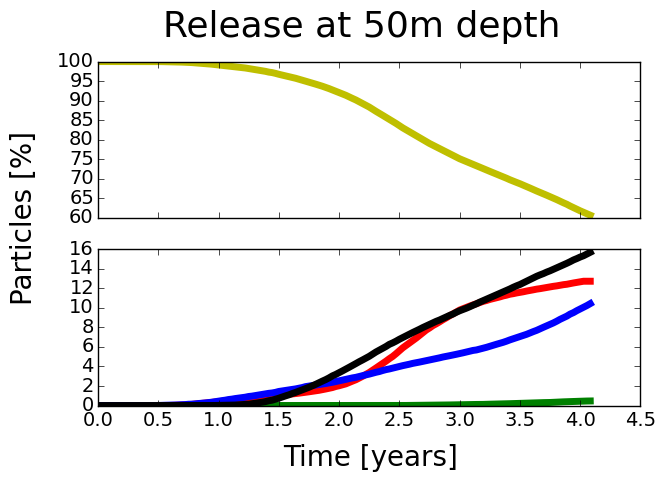

In [133]:
plot_1NPP(npts = Sum_Zones['Z1'][0], title = 'Release at ' + title_depth + ' depth', dictionary_of_zones=Sum_Zones, linewidth=5)

***

***

***

# Histograms

### With threshold 

In [ ]:
Ind_parti_north = pickle_load('Ind_parti_north', path_save)
T_step_parti_north = pickle_load('T_step_parti_north', path_save)

In [ ]:
# Check if lists containing indexes p and t have same length = nb of parti that go north
list_p_thresh = []
list_t_thresh = []

for NPP in npp:
    list_p_thresh.append(len(Ind_parti_north[NPP]))
    list_t_thresh.append(len(T_step_parti_north[NPP]))
    print len(T_step_parti_north[NPP]), len(Ind_parti_north[NPP])

In [ ]:
import itertools

In [ ]:
# Make one list with all depths, longitudes, times of crossing for all NPPs

DEP_cross = []
LON_cross = []
TIME_cross = []
for NPP in npp:
    #print 'NPP', NPP
    DEP = pickle_load('NPP' + NPP + '_DEP', path_load, verbose=False)[:max_time_experiment]
    DEP_cross.append(DEP[T_step_parti_north[NPP],Ind_parti_north[NPP]])
    
    LON = pickle_load('NPP' + NPP + '_LON', path_load, verbose=False)[:max_time_experiment]
    LON_cross.append(LON[T_step_parti_north[NPP],Ind_parti_north[NPP]])
    
    TIME_cross.append(T_step_parti_north[NPP])
   
DEP_cross = list(itertools.chain(*DEP_cross))
LON_cross = list(itertools.chain(*LON_cross))
TIME_cross = list(itertools.chain(*TIME_cross))

In [ ]:
pickle_save('DEP_cross', path_save, DEP_cross)
pickle_save('LON_cross', path_save, LON_cross)
pickle_save('TIME_cross', path_save, TIME_cross)

### Function to plot histograms

In [ ]:
def plot_hist(data, bins, weights, title, xlabel, title_save):
    fiig = plt.figure(figsize=(8,5))
    ax = fiig.add_subplot(1,1,1)

    if weights == True:
        weights = np.ones_like(np.array(data))/float(len(data))
        ax.hist(data, bins=bins, color='c', weights=weights, normed=True)
    else:
        ax.hist(data, bins=bins, color='c')
    ax.set_title(title, fontsize=18,  y=1.04)
    ax.set_xlabel(xlabel, fontsize=16)
    ax.set_ylabel('Probability density', fontsize=16, labelpad=10)
    fiig.tight_layout
    plt.savefig(path_save_fig + title_save, bbox_inches='tight')#, format='pdf') #  dpi=1000,

### Histograms of depth, lon, time (year) of crossing

In [ ]:
print 'Depth :'
print 'min :', np.array(DEP_cross).min()
print 'max :', np.array(DEP_cross).max()
print ''

print 'Longitude :'
print 'min :', np.array(LON_cross).min()
print 'max :', np.array(LON_cross).max()
print ''

TIME_cross_yr = np.array(TIME_cross, dtype=np.float64)*10/360
print 'Time :'
print 'min :', np.array(TIME_cross_yr).min()
print 'max :', np.array(TIME_cross_yr).max()

plot_hist(DEP_cross, np.arange(0, 1660, 100), True, 'Depths of crossing' + '(' + title_depth + ')', 'Depth [m]', 'depth_' + title_depth + '.png')

plot_hist(np.array(LON_cross)-360, np.arange(174-360, 270-360, 5), True, 'Longitudes of crossing' + '(' + title_depth + ')', 'Longitude [$^\circ$]', 'lon_' + title_depth + '.png')

TIME_cross_yr = np.array(TIME_cross, dtype=np.float64)*10/360 
plot_hist(TIME_cross_yr, np.arange(0, 4.2, 0.25), True, 'Times of crossing' + '(' + title_depth + ')', 'Time [years]', 'time_' + title_depth + '.png')

***

### Histogram of months of crossing

#### This makes a list of 5yrs filled with the info on which month it is

In [ ]:
MAY = []
JUL = []
AUG = []
OCT = []
DEC = []
JAN = []
MAR = []

for i in range(1,32):
    MAY.append('MAY')
    JUL.append('JUL')
    AUG.append('AUG')
    OCT.append('OCT')
    DEC.append('DEC')
    JAN.append('JAN')
    MAR.append('MAR')

In [ ]:
JUN = []
SEP = []
NOV = []

for i in range(1,31):
    JUN.append('JUN')
    SEP.append('SEP')
    NOV.append('NOV')

In [ ]:
FEV = []
for i in range(1,29):
    FEV.append('FEV')

In [ ]:
beg_APR = []
end_APR = []

for i in range(1,6):
    beg_APR.append('APR')
    
for i in range(6,31):
    end_APR.append('APR')

In [ ]:
Year = []
Year = [beg_APR, MAY, JUN, JUL, AUG, SEP, OCT, NOV, DEC, JAN, FEV, MAR, end_APR]

In [ ]:
Year_1_list = list(itertools.chain(*Year))

In [ ]:
Five_Years = []
for i in range(5):
    Five_Years.append(Year_1_list)

In [ ]:
Five_Years_1_list = list(itertools.chain(*Five_Years))

In [ ]:
len(Five_Years_1_list)

In [ ]:
pickle_save('Five_Years_1_list', path_save, Five_Years_1_list)

In [ ]:
Five_Years_1_list = pickle_load('Five_Years_1_list', path_save)

### Searchs the month that correspond to the time in index

In [ ]:
analysis = []
for i in range(len(TIME_cross)):
    analysis.append(Five_Years_1_list[np.array(TIME_cross[i])*10])

In [ ]:
from collections import Counter

num = Counter(analysis)

In [ ]:
x = list(num.values())
y = list(num.keys())

In [ ]:
X = list(x)
Y = list(y)

In [ ]:
for i in range(12):
    if y[i] == 'JAN':
        Y[0] = y[i]
        X[0] = x[i]
    if y[i] == 'FEV':
        Y[1] = y[i]
        X[1] = x[i]
    if y[i] == 'MAR':
        Y[2] = y[i]
        X[2] = x[i]
    if y[i] == 'APR':
        Y[3] = y[i]
        X[3] = x[i]
    if y[i] == 'MAY':
        Y[4] = y[i]
        X[4] = x[i]
    if y[i] == 'JUN':
        Y[5] = y[i]
        X[5] = x[i]
    if y[i] == 'JUL':
        Y[6] = y[i]
        X[6] = x[i]
    if y[i] == 'AUG':
        Y[7] = y[i]
        X[7] = x[i]
    if y[i] == 'SEP':
        Y[8] = y[i]
        X[8] = x[i]
    if y[i] == 'OCT':
        Y[9] = y[i]
        X[9] = x[i]
    if y[i] == 'NOV':
        Y[10] = y[i]
        X[10] = x[i]
    if y[i] == 'DEC':
        Y[11] = y[i]
        X[11] = x[i]

In [ ]:
for i in range(12):
    print i, Y[i]

### Plot the histogram

x_coordinates = np.arange(len(num.keys()))

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)

ax.bar(x_coordinates, np.array(X)/float(len(TIME_cross)), width=1, color='c')

x_coordinates = np.arange(len(num.keys()))+0.5

ax.set_title('Months of crossing' + '(' + title_depth + ')', fontsize=18, y=1.04)
plt.xticks(x_coordinates, Y, rotation=70)
tick = plt.gca()
tick.tick_params(axis = 'x', which = 'major', labelsize = 14)
ax.set_ylabel('Probability density', fontsize=16, labelpad=10)
fig.tight_layout
plt.savefig(path_save_fig + 'month_' + title_depth + '.png', bbox_inches='tight')#, format='pdf') #  dpi=1000,

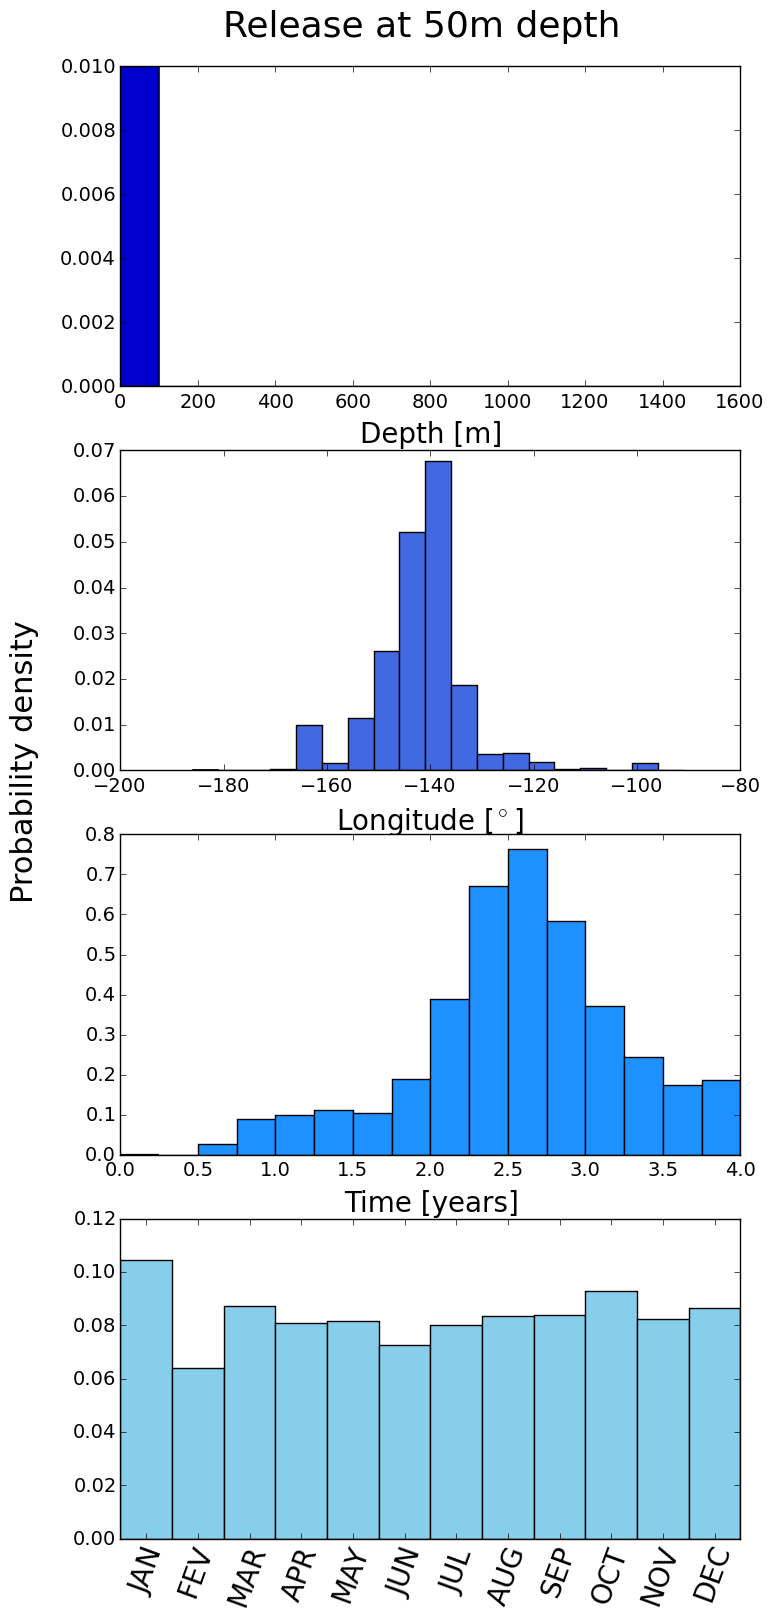

In [134]:
fig = plt.figure(figsize=(8,19))
fig.suptitle('Release at ' + title_depth + ' depth', fontsize=26, y=0.93)

# Depth
ax1 = fig.add_subplot(411)
weights = np.ones_like(np.array(DEP_cross))/float(len(DEP_cross))
plt.hist(DEP_cross, np.arange(0, 1660, 100), color='mediumblue', weights=weights, normed=True)
ax1.set_xlabel('Depth [m]', fontsize=20, labelpad=7)
ax1.tick_params(labelsize=14)

# Longitude
ax2 = fig.add_subplot(412)
weights = np.ones_like(np.array(np.array(LON_cross)-360))/float(len(np.array(LON_cross)-360))
plt.hist(np.array(LON_cross)-360, np.arange(174-360, 270-360, 5), color='royalblue', weights=weights, normed=True)
ax2.set_xlabel('Longitude [$^\circ$]', fontsize=20, labelpad=7)
ax2.tick_params(labelsize=14)

# Time
ax3 = fig.add_subplot(413)
TIME_cross_yr = np.array(TIME_cross, dtype=np.float64)*10/360 
weights = np.ones_like(np.array(TIME_cross_yr))/float(len(TIME_cross_yr))
plt.hist(TIME_cross_yr, np.arange(0, 4.1, 0.25), color='dodgerblue', weights=weights, normed=True)
ax3.set_xlabel('Time [years]', fontsize=20, labelpad=7)
ax3.tick_params(labelsize=14)

# Months
ax4 = fig.add_subplot(414)
x_coordinates = np.arange(len(num.keys()))
plt.bar(x_coordinates, np.array(X)/float(len(TIME_cross)), width=1, color='skyblue')
x_coordinates = np.arange(len(num.keys()))+0.5
plt.xticks(x_coordinates, Y, rotation=70)
ax4.tick_params(labelsize=14)
tick = plt.gca()
tick.tick_params(axis = 'x', which = 'major', labelsize = 20)

# Titre yaxis
ax2.set_ylabel('Probability density', fontsize=22, labelpad=25, y=0.03)
plt.savefig(path_save_fig + '4hist_' + title_depth + '.png', bbox_inches='tight')#, format='pdf') #  dpi=1000,
plt.show()